In [4]:
# Linear Regression
import numpy as np
import pandas as pd
import os
os.chdir("C://Users\HP\Desktop\Pranav\WISC")
print (os.getcwd())

C:\Users\HP\Desktop\Pranav\WISC


In [8]:
HP = pd.read_excel('House Prices.xlsx')
HP.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
print(HP.columns.values)

['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'PoolQC' 'Fence' 'MiscFeature'
 'MiscVal' 'MoSold' 'YrSold' 'SaleTy

In [10]:
HP.shape

(1460, 81)

In [11]:
HP.isnull().sum().sum()

6965

In [12]:
HP.LotArea.describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

In [13]:
np.unique(HP.LotShape,return_counts=True)

(array(['IR1', 'IR2', 'IR3', 'Reg'], dtype=object),
 array([484,  41,  10, 925], dtype=int64))

In [14]:
HP.LotFrontage.isnull().sum()

259

In [15]:
# find out invalid values
HP.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [16]:
print(HP.LotFrontage.describe())

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64


In [17]:
print(np.array(HP.LotFrontage).shape)
print(np.array(HP.LotFrontage).reshape(-1,1).shape)

(1460,)
(1460, 1)


In [18]:
from sklearn.impute import SimpleImputer
SI = SimpleImputer(strategy='mean')
HP.LotFrontage = SI.fit_transform(np.array(HP.LotFrontage).reshape(-1,1))
print(HP.LotFrontage.describe())

count    1460.000000
mean       70.049958
std        22.024023
min        21.000000
25%        60.000000
50%        70.049958
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64


In [19]:
print(HP.YearBuilt.isnull().sum())
print(HP.YrSold.isnull().sum())
print(HP.YearRemodAdd.isnull().sum())

0
0
0


In [20]:
# calculate the age of the house
HP["Age"] = HP.YrSold - HP.YearBuilt
print(HP.Age.isnull().sum())
print(HP.Age.describe())
HP.Remodage = HP.YrSold - HP.YearRemodAdd
print(HP.Remodage.describe())

0
count    1460.000000
mean       36.547945
std        30.250152
min         0.000000
25%         8.000000
50%        35.000000
75%        54.000000
max       136.000000
Name: Age, dtype: float64
count    1460.000000
mean       22.950000
std        20.640653
min        -1.000000
25%         4.000000
50%        14.000000
75%        41.000000
max        60.000000
dtype: float64


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """


In [21]:
HP[HP.YrSold < HP.YearRemodAdd].YearRemodAdd

523    2008
Name: YearRemodAdd, dtype: int64

In [22]:
#HP.loc[HP.Remodage < 0,HP.Remodage] = 0
#print(HP.Remodage.describe())

In [23]:
# correlation between age and sale price
np.corrcoef(HP.SalePrice, HP.Age)

array([[ 1.        , -0.52335042],
       [-0.52335042,  1.        ]])

In [24]:
# check correlation between sale price and lot area
np.corrcoef(HP.SalePrice,HP.LotArea)

array([[1.        , 0.26384335],
       [0.26384335, 1.        ]])

In [25]:
np.corrcoef(HP.SalePrice,HP.GrLivArea)

array([[1.        , 0.70862448],
       [0.70862448, 1.        ]])

In [26]:
from matplotlib import pyplot as plt
plt.scatter(HP.LotArea,HP.SalePrice)
plt.show()

<Figure size 640x480 with 1 Axes>

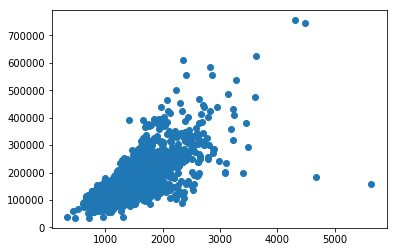

In [27]:
from matplotlib import pyplot as plt
plt.scatter(HP.GrLivArea,HP.SalePrice)
plt.show()

In [28]:
# define dataframe for independent variables
Independent = pd.DataFrame(HP,columns=["GrLivArea"])
Independent.describe()

,GrLivArea
count,1460.000000
mean,1515.463699
std,525.480383
min,334.000000
25%,1129.500000
50%,1464.000000
75%,1776.750000
max,5642.000000


In [29]:
# define dataframe for dependent variables
Dependent = pd.DataFrame(HP,columns=["SalePrice"])
Dependent.describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


In [30]:
# build linear model using sklearn
from sklearn.linear_model import LinearRegression
# initialize linear model
lm = LinearRegression(fit_intercept=True, normalize=False)
# apply linear model
lm.fit(Independent, Dependent)
print (lm.coef_)
print (lm.intercept_)

[[107.13035897]]
[18569.02585649]


In [31]:
# R square
print(lm.score(Independent, Dependent))

0.5021486502718042


In [32]:
predict = lm.predict(Independent)
print(predict[0:10])

[[201761.93968805]
 [153767.53887136]
 [209903.84696945]
 [202511.85220081]
 [254041.55486337]
 [164480.57476794]
 [200047.8539446 ]
 [242471.47609506]
 [208618.28266186]
 [133948.42246268]]


In [33]:
# create a list with required columns
selcolumns = list(['TotalBsmtSF','GrLivArea','GarageArea','MiscVal','Neighborhood'])

In [34]:
# check correlation between sale price and TotalBsmtSF
np.corrcoef(HP.SalePrice,HP.TotalBsmtSF)

array([[1.        , 0.61358055],
       [0.61358055, 1.        ]])

In [35]:
# check correlation between sale price and GrLivArea
np.corrcoef(HP.SalePrice,HP.GrLivArea)

array([[1.        , 0.70862448],
       [0.70862448, 1.        ]])

In [36]:
# check correlation between sale price and GarageArea
np.corrcoef(HP.SalePrice,HP.GarageArea)

array([[1.        , 0.62343144],
       [0.62343144, 1.        ]])

In [37]:
# check correlation between sale price and MiscVal
np.corrcoef(HP.SalePrice,HP.MiscVal)

array([[ 1.        , -0.02118958],
       [-0.02118958,  1.        ]])

In [38]:
np.unique(HP.Neighborhood)

array(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
       'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel',
       'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown',
       'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber',
       'Veenker'], dtype=object)

In [39]:
# apply anova f-test on Neighbourhood and sale price
import statsmodels.api as sm
from statsmodels.formula.api import ols
ftest = ols("SalePrice ~ Neighborhood", data=HP).fit()
anova = sm.stats.anova_lm(ftest)
print(anova)

                  df        sum_sq       mean_sq          F         PR(>F)
Neighborhood    24.0  5.023606e+12  2.093169e+11  71.784865  1.558600e-225
Residual      1435.0  4.184305e+12  2.915892e+09        NaN            NaN


In [40]:
# apply anova f-test on Neighbourhood and sale price
import statsmodels.api as sm
from statsmodels.formula.api import ols
ftest = ols("SalePrice ~ LotShape", data=HP).fit()
anova = sm.stats.anova_lm(ftest)
print(anova)

              df        sum_sq       mean_sq          F        PR(>F)
LotShape     3.0  7.032607e+11  2.344202e+11  40.132852  6.447524e-25
Residual  1456.0  8.504651e+12  5.841106e+09        NaN           NaN


In [41]:
# apply anova f-test on MSSubClass and sale price
import statsmodels.api as sm
from statsmodels.formula.api import ols
ftest = ols("SalePrice ~ MSSubClass", data=HP).fit()
anova = sm.stats.anova_lm(ftest)
print(anova)

                df        sum_sq       mean_sq          F    PR(>F)
MSSubClass     1.0  6.541130e+10  6.541130e+10  10.431466  0.001266
Residual    1458.0  9.142500e+12  6.270576e+09        NaN       NaN


In [42]:
# create independent and dependent data files
selcolumns = list(['TotalBsmtSF','GrLivArea','GarageArea','MiscVal','Neighborhood'])
#selcolumns = list(['TotalBsmtSF','GrLivArea','GarageArea','Age',
#                   'Neighborhood','MSSubClass','MSZoning',
#                   'OverallQual'])
Independent = pd.DataFrame(HP,columns=selcolumns)
Independent.head()

,TotalBsmtSF,GrLivArea,GarageArea,MiscVal,Neighborhood
0,856,1710,548,0,CollgCr
1,1262,1262,460,0,Veenker
2,920,1786,608,0,CollgCr
3,756,1717,642,0,Crawfor
4,1145,2198,836,0,NoRidge


In [43]:
Independent.TotalBsmtSF.describe()

count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64

In [44]:
Independent.TotalBsmtSF[Independent.TotalBsmtSF==0].shape

(37,)

In [45]:
Independent.GrLivArea.describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

In [46]:
Independent.GarageArea.describe()

count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64

In [47]:
Independent.GarageArea[Independent.GarageArea==0].shape

(81,)

In [48]:
# define dataframe for dependent variable
Dependent = pd.DataFrame(HP,columns=["SalePrice"])
Dependent.describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


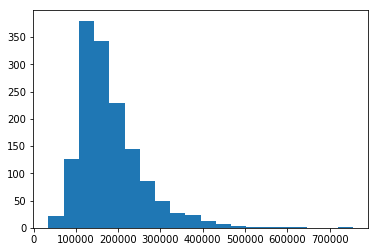

In [49]:
plt.hist(Dependent.SalePrice,bins=20)
plt.show()

In [50]:
# split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(Independent,
                                                    Dependent,
                                                    test_size=0.20,
                                                   random_state=0)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print(Y_train[0:10])

(1168, 5)
(1168, 1)
(292, 5)
(292, 1)
      SalePrice
618      314813
870      109500
92       163500
817      271000
302      205000
1454     185000
40       160000
959      155000
75        91000
1389     131000


In [51]:
# extract only continuous columns
ContColumns = list(['TotalBsmtSF','GrLivArea','GarageArea','MiscVal'])
#ContColumns = list(['TotalBsmtSF','GrLivArea','GarageArea','Age'])
X_train_cont = pd.DataFrame(X_train,columns=ContColumns)
X_test_cont = pd.DataFrame(X_test,columns=ContColumns)
print(X_train_cont.shape)
print(X_test_cont.shape)
print(X_train_cont.head())

(1168, 4)
(292, 4)
     TotalBsmtSF  GrLivArea  GarageArea  MiscVal
618         1822       1828         774        0
870          894        894         308        0
92           876        964         432        0
817         1568       1689         857        0
302         1541       1541         843        0


In [52]:
# apply sclaing on continuous variables
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X_train_cont2 = SS.fit_transform(X_train_cont)
X_test_cont2 = SS.transform(X_test_cont)
print(type(X_train_cont2))
print(X_train_cont2.shape)
print(X_train_cont2[0:10])

<class 'numpy.ndarray'>
(1168, 4)
[[ 1.86572881  0.60188649  1.43474327 -0.09258767]
 [-0.38726187 -1.21671763 -0.79116606 -0.09258767]
 [-0.43096212 -1.08041967 -0.19886401 -0.09258767]
 [ 1.24906972  0.3312377   1.83120352 -0.09258767]
 [ 1.18351935  0.04306489  1.76433071 -0.09258767]
 [ 0.40662601 -0.58001147 -0.35171615 -0.09258767]
 [ 0.08372971 -0.37945877 -0.16065097 -0.09258767]
 [-0.86796463 -0.20032432  0.04952072 -0.09258767]
 [-1.43606788 -1.03368895 -0.84370899 -0.09258767]
 [-0.77328075 -0.58585281 -0.16065097 -0.09258767]]


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """


In [53]:
# apply sclaing on target data
SS2  = StandardScaler()
Y_train_SS = SS2.fit_transform(Y_train)
Y_test_SS = SS2.transform(Y_test)
print(type(Y_train_SS))
print(Y_train_SS[0:10])

<class 'numpy.ndarray'>
[[ 1.70779177]
 [-0.90878376]
 [-0.22059023]
 [ 1.14942468]
 [ 0.30829925]
 [ 0.05341275]
 [-0.26519536]
 [-0.32891699]
 [-1.14455377]
 [-0.63478078]]


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [54]:
# convert X_train3 as dataframe
X_train_cont3 = pd.DataFrame(X_train_cont2,columns=ContColumns)
X_test_cont3 = pd.DataFrame(X_test_cont2,columns=ContColumns)
print(X_train_cont3.head())

   TotalBsmtSF  GrLivArea  GarageArea   MiscVal
0     1.865729   0.601886    1.434743 -0.092588
1    -0.387262  -1.216718   -0.791166 -0.092588
2    -0.430962  -1.080420   -0.198864 -0.092588
3     1.249070   0.331238    1.831204 -0.092588
4     1.183519   0.043065    1.764331 -0.092588


In [55]:
# extract only catgorical columns
CatColumns = list(['Neighborhood'])
#,'MSSubClass','MSZoning','OverallQual'])
X_train_cat = pd.DataFrame(X_train,columns=CatColumns)
X_test_cat = pd.DataFrame(X_test,columns=CatColumns)
print(X_train_cat.shape)
print(X_train_cat.head())

(1168, 1)
    Neighborhood
618      NridgHt
870        NAmes
92       Crawfor
817      Mitchel
302      CollgCr


In [56]:
Ncols = np.unique(X_train_cat.Neighborhood,return_counts=False)
print(Ncols)
print(len(Ncols))

['Blmngtn' 'Blueste' 'BrDale' 'BrkSide' 'ClearCr' 'CollgCr' 'Crawfor'
 'Edwards' 'Gilbert' 'IDOTRR' 'MeadowV' 'Mitchel' 'NAmes' 'NPkVill'
 'NWAmes' 'NoRidge' 'NridgHt' 'OldTown' 'SWISU' 'Sawyer' 'SawyerW'
 'Somerst' 'StoneBr' 'Timber' 'Veenker']
25


In [57]:
MScols = np.unique(HP.MSSubClass,return_counts=False)
print(MScols)
print(len(MScols))

[ 20  30  40  45  50  60  70  75  80  85  90 120 160 180 190]
15


In [58]:
MSZcols = np.unique(HP.MSZoning,return_counts=False)
print(MSZcols)
print(len(MSZcols))

['C (all)' 'FV' 'RH' 'RL' 'RM']
5


In [59]:
OQcols = np.unique(HP.OverallQual,return_counts=False)
print(OQcols)
print(len(OQcols))

[ 1  2  3  4  5  6  7  8  9 10]
10


In [60]:
# apply one hot enconding on categorical
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder(sparse=False,handle_unknown='error',
                    categorical_features='all')
X_train_cat1 = OHE.fit_transform(X_train_cat)
X_test_cat1 = OHE.transform(X_test_cat)
print(X_train_cat1.shape)
print(X_test_cat1.shape)
print(X_train_cat1[0:5])

(1168, 25)
(292, 25)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]]


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:382: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. The passed value of 'all' is the default and can simply be removed.
  DeprecationWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:382: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. The passed value of 'all' is the default and can simply be removed.
  DeprecationWarning)


In [61]:
# convert array to data frame
X_train_cat2 = pd.DataFrame(X_train_cat1)
X_test_cat2 = pd.DataFrame(X_test_cat1)
print(X_train_cat2.head())

    0    1    2    3    4    5    6    7    8    9   ...   15   16   17   18  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  1.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

    19   20   21   22   23   24  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 25 columns]


In [62]:
# merge scaled continuous and onehotencoded categorical data
X_train_final = pd.concat([X_train_cont3,X_train_cat2],
                          axis=1,join='outer',sort=False,
                          ignore_index=True)
X_test_final = pd.concat([X_test_cont3,X_test_cat2],
                         axis=1,join='outer',sort=False,
                         ignore_index=True)
print(X_train_final.shape)
print(X_test_final.shape)

(1168, 29)
(292, 29)


In [63]:
X_train_cat2.index

RangeIndex(start=0, stop=1168, step=1)

In [64]:
X_train_final.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1.865729,0.601886,1.434743,-0.092588,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.387262,-1.216718,-0.791166,-0.092588,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.430962,-1.080420,-0.198864,-0.092588,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.249070,0.331238,1.831204,-0.092588,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.183519,0.043065,1.764331,-0.092588,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
# build linear model using sklearn
from sklearn.linear_model import LinearRegression
# initialize linear model
lm = LinearRegression(normalize=False)
# apply cross validation
from sklearn.model_selection import GridSearchCV
params = {'fit_intercept':[True,False]}
CV = GridSearchCV(estimator = lm, scoring='r2',cv=5,
                  refit=True,return_train_score=True,
                  param_grid=params,verbose=10)
# apply linear model
CV.fit(X_train_final, Y_train_SS)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] fit_intercept=True ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..... fit_intercept=True, score=0.8259349089450714, total=   0.1s
[CV] fit_intercept=True ..............................................
[CV] ..... fit_intercept=True, score=0.7321579856952141, total=   0.0s
[CV] fit_intercept=True ..............................................
[CV] ..... fit_intercept=True, score=0.8079089857698277, total=   0.0s
[CV] fit_intercept=True ..............................................
[CV] ..... fit_intercept=True, score=0.7666575158150045, total=   0.0s
[CV] fit_intercept=True ..............................................
[CV] . fit_intercept=True, score=-2.494693418041579e+22, total=   0.0s
[CV] fit_intercept=False .............................................
[CV] .... fit_intercept=False, score=0.8259349089450714, total=   0.0s
[CV] fit_intercept=False .............................................
[CV] .... fit_intercept=False, score=0.7321579856952143, total=   0.0s
[CV] fit_intercept=False .............................................
[CV] .

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24.

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=10)

In [105]:
# store the CV model
#import pickle
#pickle.dump(CV, open('CV_Logistic1.sav', 'wb'))
#pickle.dump(OHE, open('OHE_Logistic1.sav', 'wb'))
#pickle.dump(SS, open('SS_Logistic1.sav', 'wb'))

"\nimport pickle\npickle.dump(CV, open('CV_Logistic1.sav', 'wb'))\npickle.dump(OHE, open('OHE_Logistic1.sav', 'wb'))\npickle.dump(SS, open('SS_Logistic1.sav', 'wb'))"

In [67]:
# read CV file
#import pickle
#CV = pickle.load(open('CV_Logistic1.sav', 'rb'))
#OHE = pickle.load(open('OHE_Logistic1.sav', 'rb'))
#SS = pickle.load(open('SS_Logistic1.sav', 'rb'))

In [68]:
CVResults = pd.DataFrame(CV.cv_results_)
#CVResults.to_excel('CVResutls_Linear.xlsx')

In [69]:
print(CV.best_score_)

0.7911058869692196


In [70]:
print(CV.best_estimator_)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)


In [71]:
print(CV.best_estimator_.coef_)

[[ 0.22601465  0.41125525  0.14240675  0.00645581  0.12725265 -0.21110475
  -0.28469357 -0.18691279  0.15633537  0.15404367  0.2469016  -0.32193539
   0.15776785 -0.49155503 -0.36839313 -0.17573423 -0.21446125 -0.18222398
  -0.1101798   0.76707991  0.92205378 -0.47030602 -0.52893605 -0.22125815
  -0.03185749  0.35738849  0.93051159  0.3506743   0.34363885]]


In [72]:
print(CV.best_estimator_.intercept_)

0.0


In [73]:
# draw histogram of errors
train_predict = CV.predict(X_train_final)
print(train_predict[0:5])
Error = train_predict - Y_train_SS
#print(Error.describe())

[[ 1.79498419]
 [-0.91563474]
 [-0.32374772]
 [ 0.50297508]
 [ 0.68990192]]


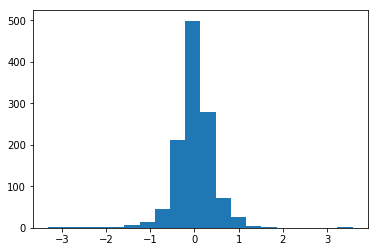

In [74]:
from matplotlib import pyplot as plt
plt.hist(Error,bins=20)
plt.show()

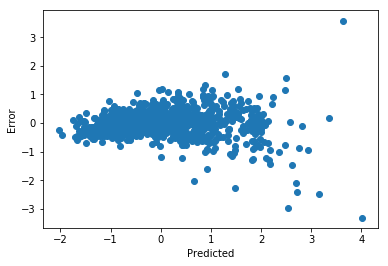

In [75]:
# plot error vs predicted
plt.scatter(train_predict,Error)
plt.xlabel("Predicted")                                 # label for X axis
plt.ylabel("Error")   
#plt.legend()
plt.show()

In [76]:
# apply the model on test
predict = CV.predict(X_test_final)
# calculate r square
print(CV.score(X_test_final,Y_test_SS))

0.6547289567323271


In [77]:
# check correlation between independent and dependent in test
print(np.corrcoef(Y_train.SalePrice,X_train.TotalBsmtSF))
print(np.corrcoef(Y_test.SalePrice,X_test.TotalBsmtSF))

[[1.         0.63553525]
 [0.63553525 1.        ]]
[[1.         0.55850995]
 [0.55850995 1.        ]]


In [78]:
print(np.corrcoef(Y_train.SalePrice,X_train.GrLivArea))
print(np.corrcoef(Y_test.SalePrice,X_test.GrLivArea))

[[1.         0.72170652]
 [0.72170652 1.        ]]
[[1.         0.66509277]
 [0.66509277 1.        ]]


In [79]:
print(np.corrcoef(Y_train.SalePrice,X_train.GarageArea))
print(np.corrcoef(Y_test.SalePrice,X_test.GarageArea))

[[1.         0.64660265]
 [0.64660265 1.        ]]
[[1.         0.54440532]
 [0.54440532 1.        ]]


In [80]:
# get the predicted sale prices to original scale
print(predict[0:10])
predictfinal = SS2.inverse_transform(predict)
print(predictfinal[0:10])

[[ 1.58956619]
 [-0.46245672]
 [-0.7122339 ]
 [ 0.63838272]
 [-1.05972269]
 [-1.01779271]
 [ 0.74032007]
 [-0.70958336]
 [ 4.10191667]
 [-0.24843795]]
[[305536.27572845]
 [144521.63148347]
 [124922.54037865]
 [230900.42909263]
 [ 97656.38117697]
 [100946.47125176]
 [238899.07548188]
 [125130.51802569]
 [502671.12175959]
 [161314.89243689]]


In [81]:
# LASSO regression
# build linear model using sklearn
from sklearn.linear_model import Lasso
# initialize linear model
LASSO = Lasso(normalize=False,max_iter=100)
# apply cross validation
from sklearn.model_selection import GridSearchCV
params = {"alpha": [0.01,0.10,0.50,1.0],
          "fit_intercept":['True','False']}
CV2 = GridSearchCV(estimator = LASSO, scoring='r2',cv=5,refit=True,
                  return_train_score=True,param_grid=params,verbose=10)
# apply linear model
CV2.fit(X_train_final, Y_train_SS)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] alpha=0.01, fit_intercept=True ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  alpha=0.01, fit_intercept=True, score=0.7954145526779424, total=   0.1s
[CV] alpha=0.01, fit_intercept=True ..................................
[CV]  alpha=0.01, fit_intercept=True, score=0.6386126675691121, total=   0.0s
[CV] alpha=0.01, fit_intercept=True ..................................
[CV]  alpha=0.01, fit_intercept=True, score=0.7762675746719532, total=   0.0s
[CV] alpha=0.01, fit_intercept=True ..................................
[CV]  alpha=0.01, fit_intercept=True, score=0.7355600916387744, total=   0.0s
[CV] alpha=0.01, fit_intercept=True ..................................
[CV]  alpha=0.01, fit_intercept=True, score=0.8174141149979808, total=   0.0s
[CV] alpha=0.01, fit_intercept=False .................................
[CV]  alpha=0.01, fit_intercept=False, score=0.7954145526779424, total=   0.0s
[CV] alpha=0.01, fit_intercept=False .................................
[CV]  alpha=0.01, fit_intercept=False, score=0.6386126675691121, total=   0.0s
[CV] alpha=0.01, fit_inter

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s



[CV] alpha=0.1, fit_intercept=False ..................................
[CV]  alpha=0.1, fit_intercept=False, score=0.6083574694552558, total=   0.0s
[CV] alpha=0.1, fit_intercept=False ..................................
[CV]  alpha=0.1, fit_intercept=False, score=0.7072573175737256, total=   0.0s
[CV] alpha=0.1, fit_intercept=False ..................................
[CV]  alpha=0.1, fit_intercept=False, score=0.6885483774514112, total=   0.0s
[CV] alpha=0.1, fit_intercept=False ..................................
[CV]  alpha=0.1, fit_intercept=False, score=0.7578532411129026, total=   0.0s
[CV] alpha=0.5, fit_intercept=True ...................................
[CV]  alpha=0.5, fit_intercept=True, score=0.31545004872575955, total=   0.0s
[CV] alpha=0.5, fit_intercept=True ...................................
[CV]  alpha=0.5, fit_intercept=True, score=0.30976574074734686, total=   0.0s
[CV] alpha=0.5, fit_intercept=True ...................................
[CV]  alpha=0.5, fit_intercept=Tru

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=100,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.01, 0.1, 0.5, 1.0], 'fit_intercept': ['True', 'False']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=10)

In [82]:
print(CV2.best_estimator_.n_iter_)

11


In [83]:
print(CV2.best_estimator_)
print(CV2.best_estimator_.coef_)
print(CV2.best_estimator_.intercept_)

Lasso(alpha=0.01, copy_X=True, fit_intercept='True', max_iter=100,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
[ 0.27872839  0.44774373  0.22414956 -0.          0.         -0.
 -0.         -0.          0.          0.          0.         -0.07697116
  0.         -0.         -0.         -0.         -0.11210105 -0.
 -0.          0.18668956  0.5257667  -0.28299635 -0.         -0.
 -0.          0.10343323  0.08280842  0.          0.        ]
[0.00386346]


In [84]:
print(CV2.best_score_)

0.7526129898607977


In [85]:
CVResults = pd.DataFrame(CV2.cv_results_)
#CVResults.to_excel('CVResults_Lasso.xlsx')

In [86]:
# draw histogram of errors
train_predict2 = CV2.predict(X_train_final)
print(train_predict2.shape)
print(Y_train.shape)
Error2 = train_predict2 - Y_train.SalePrice
print(Error2.describe())

(1168,)
(1168, 1)
count      1168.000000
mean    -180808.898973
std       78499.177707
min     -754996.046266
25%     -214999.807018
50%     -163000.057252
75%     -130000.064125
max      -34901.425403
Name: SalePrice, dtype: float64


In [106]:
Error2

618    -314811.359250
870    -109500.938296
92     -163500.644584
817    -270999.089212
302    -204999.251500
1454   -185000.117899
40     -160000.290810
959    -155000.213224
75      -91001.048354
1389   -131000.509994
1254   -165400.243708
689    -194699.412986
648    -155000.064350
247    -140000.045772
1308   -147000.654568
1164   -193999.742032
708    -179540.350067
186    -173000.143294
156    -109501.076571
914    -173733.390343
8      -129900.131443
390    -119000.431760
1333   -125500.493289
1441   -149300.777510
619    -304998.763495
771    -102000.563985
465    -178739.951003
1248   -129500.107781
431     -79901.169194
1288   -277999.461200
            ...      
1435   -173999.925243
1201   -197899.818770
99     -128950.941602
850    -131500.777510
448    -119500.600901
755    -172500.190053
976     -85501.484978
115    -176000.201387
777    -142500.705166
72     -185000.022369
845    -170999.462589
537    -111250.697809
849    -187000.017639
174    -183999.354660
87     -16

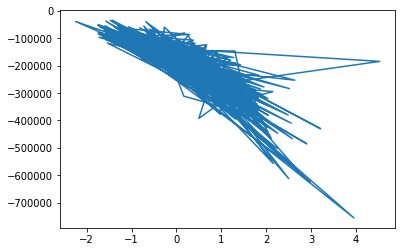

In [87]:
# plot error vs predicted
plt.plot(train_predict2,Error2)
plt.show()

In [88]:
# apply the model on test
#predict2 = CV2.predict(X_test_final)
# calculate r square
print(CV2.score(X_test_final,Y_test_SS))

0.5493896612612837


In [89]:
# Ridge regression
# build linear model using sklearn
from sklearn.linear_model import Ridge
# initialize linear model
RIDGE = Ridge(fit_intercept=True, normalize=False,
              max_iter=1000,solver='auto')
# apply cross validation
from sklearn.model_selection import GridSearchCV
params = {"alpha": [0.2,0.4,0.6,0.8,1.0]}
CV3 = GridSearchCV(estimator = RIDGE, scoring='r2',cv=5,refit=True,
                  return_train_score=True,param_grid=params,verbose=10)
# apply linear model
CV3.fit(X_train_final, Y_train_SS)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] alpha=0.2 .......................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............. alpha=0.2, score=0.8261718323489058, total=   0.2s
[CV] alpha=0.2 .......................................................
[CV] .............. alpha=0.2, score=0.7314129252411654, total=   0.0s
[CV] alpha=0.2 .......................................................
[CV] .............. alpha=0.2, score=0.8082003837193895, total=   0.0s
[CV] alpha=0.2 .......................................................
[CV] .............. alpha=0.2, score=0.7670069761592853, total=   0.0s
[CV] alpha=0.2 .......................................................
[CV] .............. alpha=0.2, score=0.8231639440720735, total=   0.0s
[CV] alpha=0.4 .......................................................
[CV] .............. alpha=0.4, score=0.8263710257617858, total=   0.0s
[CV] alpha=0.4 .......................................................
[CV] .............. alpha=0.4, score=0.7306749312916441, total=   0.0s
[CV] alpha=0.4 .......................................................
[CV] .

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.4s remaining:    0.0s


[CV] .............. alpha=0.6, score=0.7299441531337545, total=   0.0s
[CV] alpha=0.6 .......................................................
[CV] .............. alpha=0.6, score=0.8086970925882477, total=   0.0s
[CV] alpha=0.6 .......................................................
[CV] .............. alpha=0.6, score=0.7675962212961969, total=   0.0s
[CV] alpha=0.6 .......................................................
[CV] .............. alpha=0.6, score=0.8241435572477744, total=   0.0s
[CV] alpha=0.8 .......................................................
[CV] .............. alpha=0.8, score=0.8266720147593913, total=   0.0s
[CV] alpha=0.8 .......................................................
[CV] .............. alpha=0.8, score=0.7292207416788608, total=   0.0s
[CV] alpha=0.8 .......................................................
[CV] .............. alpha=0.8, score=0.8089064042249752, total=   0.0s
[CV] alpha=0.8 .......................................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.2, 0.4, 0.6, 0.8, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=10)

In [90]:
print(CV3.best_estimator_)
print(CV3.best_estimator_.coef_)
print(CV3.best_estimator_.intercept_)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, random_state=None, solver='auto', tol=0.001)
[[ 0.2305061   0.41282737  0.14730158  0.00623219  0.0863617  -0.15824278
  -0.2817312  -0.20626005  0.11759865  0.11819624  0.21040393 -0.34272175
   0.12641834 -0.49721907 -0.36431112 -0.20263736 -0.24240097 -0.18749736
  -0.14221683  0.7006114   0.86319822 -0.49200954 -0.53089403 -0.24525959
  -0.06231792  0.31638182  0.83903065  0.30269612  0.27482251]]
[0.03153989]


In [91]:
CV3.best_score_

0.7914777298444629

In [92]:
CV3Results = pd.DataFrame(CV3.cv_results_)
#CV3Results.to_excel('CV3Results_Ridge.xlsx')

In [93]:
# draw histogram of errors
train_predict3 = CV3.predict(X_train_final)
print(train_predict3.shape)
print(Y_train.SalePrice.shape)
Error3 = train_predict3 - Y_train_SS
#print(Error3.describe())

(1168, 1)
(1168,)


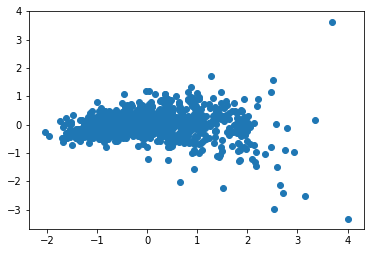

In [94]:
# plot error vs predicted
plt.scatter(train_predict3,Error3)
plt.show()

In [95]:
# R square on test
print(CV3.score(X_test_final, Y_test_SS))

0.650830162810248


In [96]:
# Elasticnet
# build elasticnet using sklearn
from sklearn.linear_model import ElasticNet
# initialize ElasticNet
EN = ElasticNet(fit_intercept=True, normalize=False,
              max_iter=10000)
# apply cross validation
from sklearn.model_selection import GridSearchCV
params = {"alpha": [0.2,0.4,0.6,0.8,1.0],
          "l1_ratio": [0.2,0.4,0.6,0.8,1.0]}
CV4 = GridSearchCV(estimator = EN, scoring='r2',cv=5,refit=True,
                  return_train_score=True,param_grid=params,verbose=10)
# apply linear model
CV4.fit(X_train_final, Y_train_SS)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] alpha=0.2, l1_ratio=0.2 .........................................
[CV] . alpha=0.2, l1_ratio=0.2, score=0.721615705219318, total=   0.0s
[CV] alpha=0.2, l1_ratio=0.2 .........................................
[CV]  alpha=0.2, l1_ratio=0.2, score=0.6080305905479328, total=   0.0s
[CV] alpha=0.2, l1_ratio=0.2 .........................................
[CV]  alpha=0.2, l1_ratio=0.2, score=0.7163030974114242, total=   0.0s
[CV] alpha=0.2, l1_ratio=0.2 .........................................
[CV]  alpha=0.2, l1_ratio=0.2, score=0.6906515170322525, total=   0.0s
[CV] alpha=0.2, l1_ratio=0.2 .........................................
[CV]  alpha=0.2, l1_ratio=0.2, score=0.7595541784814722, total=   0.0s
[CV] alpha=0.2, l1_ratio=0.4 .........................................
[CV]  alpha=0.2, l1_ratio=0.4, score=0.7111949418320481, total=   0.0s
[CV] alpha=0.2, l1_ratio=0.4 .........................................
[CV]  alpha=0.2

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s


[CV] . alpha=0.2, l1_ratio=0.8, score=0.681866898595412, total=   0.0s
[CV] alpha=0.2, l1_ratio=0.8 .........................................
[CV] . alpha=0.2, l1_ratio=0.8, score=0.590657389238092, total=   0.0s
[CV] alpha=0.2, l1_ratio=0.8 .........................................
[CV]  alpha=0.2, l1_ratio=0.8, score=0.6711351948855401, total=   0.0s
[CV] alpha=0.2, l1_ratio=0.8 .........................................
[CV]  alpha=0.2, l1_ratio=0.8, score=0.6531666086223586, total=   0.0s
[CV] alpha=0.2, l1_ratio=0.8 .........................................
[CV]  alpha=0.2, l1_ratio=0.8, score=0.7300959780200078, total=   0.0s
[CV] alpha=0.2, l1_ratio=1.0 .........................................
[CV]  alpha=0.2, l1_ratio=1.0, score=0.6622524458817414, total=   0.0s
[CV] alpha=0.2, l1_ratio=1.0 .........................................
[CV]  alpha=0.2, l1_ratio=1.0, score=0.5796546197620072, total=   0.0s
[CV] alpha=0.2, l1_ratio=1.0 .........................................
[CV] .

[CV]  alpha=0.8, l1_ratio=0.6, score=0.27726467238993124, total=   0.0s
[CV] alpha=0.8, l1_ratio=0.6 .........................................
[CV]  alpha=0.8, l1_ratio=0.6, score=0.3560968214059562, total=   0.0s
[CV] alpha=0.8, l1_ratio=0.8 .........................................
[CV]  alpha=0.8, l1_ratio=0.8, score=0.10406283452609466, total=   0.0s
[CV] alpha=0.8, l1_ratio=0.8 .........................................
[CV]  alpha=0.8, l1_ratio=0.8, score=0.08664329045840502, total=   0.0s
[CV] alpha=0.8, l1_ratio=0.8 .........................................
[CV]  alpha=0.8, l1_ratio=0.8, score=0.07855318733309513, total=   0.0s
[CV] alpha=0.8, l1_ratio=0.8 .........................................
[CV]  alpha=0.8, l1_ratio=0.8, score=0.0616611401558711, total=   0.0s
[CV] alpha=0.8, l1_ratio=0.8 .........................................
[CV]  alpha=0.8, l1_ratio=0.8, score=0.11673894314954214, total=   0.0s
[CV] alpha=0.8, l1_ratio=1.0 .........................................
[

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    1.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=10000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.2, 0.4, 0.6, 0.8, 1.0], 'l1_ratio': [0.2, 0.4, 0.6, 0.8, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=10)

In [97]:
print(CV4.best_estimator_)
print(CV4.best_estimator_.coef_)

ElasticNet(alpha=0.2, copy_X=True, fit_intercept=True, l1_ratio=0.2,
      max_iter=10000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
[ 0.27463224  0.38907617  0.24822668 -0.          0.         -0.
 -0.         -0.          0.          0.          0.         -0.
  0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.          0.         -0.         -0.         -0.
 -0.          0.          0.          0.          0.        ]


In [98]:
print(CV4.best_score_)

0.6991867166596815


In [99]:
CV4Results = pd.DataFrame(CV4.cv_results_)
#CV4Results.to_excel('CV4Results_Elasticnet.xlsx')

In [104]:
# R square on test
print(CV4.score(X_test_final, Y_test_SS))

0.5096553977603134
